In [2]:
#import libraries
#import numpy and pandas
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
#import pickle
import pickle
#use the plt inside the notebook
%matplotlib inline
#T1 level models
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier as MLP

In [3]:
#directory and name constants for the image dataset
#directory and name constants for the images
img_dir = './dataset/image/'
img_name_front = 'IMAGE_'
img_name_code = np.arange(0,3000,1).astype(str)
img_name_back = '.jpg'
#directory and name constants for the label
label_dir = './dataset/'
label_name = 'label.csv'
#pkl file directory
pkl_dir = './dataset/'
pkl_name_x0 = 'trainX0.pkl'
pkl_name_x1 = 'trainX1.pkl'
pkl_name_x2 = 'trainX2.pkl'
pkl_name_y = 'trainY.pkl'

In [4]:
#load the data
data_X0 = pd.read_pickle(pkl_dir+pkl_name_x0)
data_X1 = pd.read_pickle(pkl_dir+pkl_name_x1)
data_X2 = pd.read_pickle(pkl_dir+pkl_name_x2)
data_Y = pd.read_pickle(pkl_dir+pkl_name_y)

In [5]:
#organize the data
#distribute the label into 2 group
X0 = []
X1 = []
X2 = []
Y  = []
for i in range(3000):
    #binary label 0 stand for no tumor and 1 stands for have tumor
    if data_Y.tumor_type[i] == 'no':
        Y.append(0)
    else:
        Y.append(1)
    #list like img set
    X0.append(data_X0[i].tolist())
    X1.append(data_X1[i].tolist())
    X2.append(data_X2[i].tolist())

In [6]:
#seperate XY into train and test
#F
X0_train, X0_test, y0_train, y0_test = train_test_split(X0,Y,test_size = 0.2)
#S
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y,test_size = 0.2)
#N
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y,test_size = 0.2)

In [7]:
#MLP method
def method_MLP_pre(x_train, x_test, y_train, y_test, hidden_layer_size = (560,), activation = 'relu',solver = 'adam') :

    model = MLP(hidden_layer_sizes = hidden_layer_size, activation = activation, solver= solver,learning_rate_init=0.0005,alpha=0.0001)
    
    #clf = make_pipeline(StandardScaler(),model)
    clf = model
    clf.fit(x_train,y_train)

    r1 = cross_validate(clf,x_train,y_train,cv=5, scoring = ['accuracy','precision','recall','f1'])
    r2 = cross_validate(clf,x_test,y_test,cv=5, scoring = ['accuracy','precision','recall','f1'])
    y_score1 = clf.predict_proba(x_train)[:,1]
    y_score2 = clf.predict_proba(x_test)[:,1]
    roc1 = roc_curve(y_train,y_score1)
    roc2 = roc_curve(y_test,y_score2)
    return r1,r2,roc1,roc2



#SVM-MLP method with dataset
def method_MLP(sel):
    if sel == 0:
        return method_MLP_pre(X0_train, X0_test, y0_train, y0_test)
    elif sel ==1:
        return method_MLP_pre(X1_train, X1_test, y1_train, y1_test)
    elif sel ==2:
        return method_MLP_pre(X2_train, X2_test, y2_train, y2_test)
    else:
        return 0

In [8]:
#score plot function box
def method_box(r1,r2):

    fig,axs = plt.subplots(2,2)
    axs[0,0].boxplot([r1['test_accuracy'],r2['test_accuracy']],labels = ['train accuracy','test accuracy'])
    axs[0,1].boxplot([r1['test_precision'],r2['test_precision']],labels = ['train precision','test precision'])
    axs[1,0].boxplot([r1['test_recall'],r2['test_recall']],labels = ['train recall','test recall'])
    axs[1,1].boxplot([r1['test_f1'],r2['test_f1']],labels = ['train f1','test f1'])

In [9]:
r1,r2,roc1,roc2 = method_MLP(2)

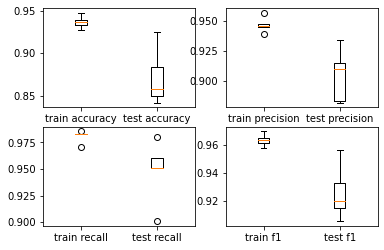

In [14]:
method_box(r1,r2)
plt.savefig('./figs/mlp1.svg')

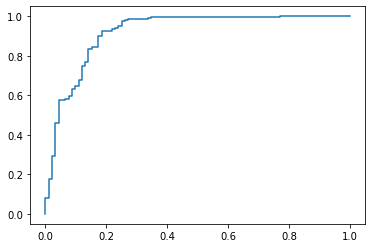

In [15]:
fpr,tpr,thresolds = roc2
plt.plot(fpr,tpr)
plt.savefig('./figs/mlp2.svg')